## Imported Libraries

In [1]:
from sklearn.datasets import load_iris
from sklearn import mixture
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import mode
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## Loaded iris dataset and splitted it

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.25, random_state=42)

## Using Gaussian Mixture Model

In [3]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3).fit(X_train)

## Mapped labels of the prediction using Mode function

In [4]:
y_pred = gmm.predict(X_test)
pred_labels = {mode(y_pred[y_test == i]).mode.item(): i for i in np.unique(y_test) }
def relabelPredicted(prediction, pred_labels):
    y_pred = [pred_labels[i] for i in prediction]
    return y_pred
y_pred_relabeled = relabelPredicted(y_pred,pred_labels)
# print(y_pred)
# print(y_test)
# print(relabelPredicted(y_pred,pred_labels))
# print(pred_labels)


## Computed np.sum(y_pred==y) / len(y_pred)

In [5]:
np.sum(y_pred_relabeled==y_test) / len(y_pred_relabeled)

0.9736842105263158

## Generate blobs

In [6]:
X, y = make_blobs(n_samples=2000, 
                  centers=np.array( [[ 0.2,  2.3],
                                     [-1.5 ,  2.3],
                                     [-2.8,  1.8],
                                     [-2.8,  2.8],
                                     [-2.8,  1.3]]), 
                  cluster_std= np.array([0.4, 0.3, 0.1, 0.1, 0.1]))


## Plotted blobs

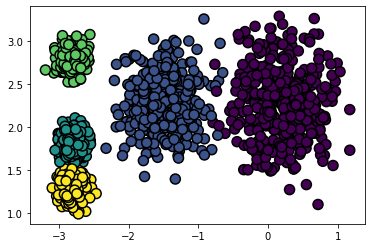

In [7]:
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

In [8]:
Xblob_train, Xblob_test, yblob_train, yblob_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Training model with kmeans using blob data

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

## Centroid of the kmeans trained model

In [10]:
for center in kmeans.cluster_centers_:
    print("Centeroid: ",center[0] ,",",center[1])

Centeroid:  -2.7962148121421557 , 2.797633416915675
Centeroid:  0.21456786318645915 , 2.2789004441386123
Centeroid:  -2.7857831359007683 , 1.808299279371944
Centeroid:  -1.4667767157237346 , 2.294148781849325
Centeroid:  -2.800378838268884 , 1.3019102462848056


## Predicted labels of new instances

In [11]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
prediction = kmeans.predict(X_new)
for pred,data in zip(prediction, X_new):
    print("Data point: (",data[0], ",", data[1],")", " Pedicted class: ", pred)

Data point: ( 0.0 , 2.0 )  Pedicted class:  1
Data point: ( 3.0 , 2.0 )  Pedicted class:  1
Data point: ( -3.0 , 3.0 )  Pedicted class:  0
Data point: ( -3.0 , 2.5 )  Pedicted class:  0


## Plotted Voronio graph with decision boundries

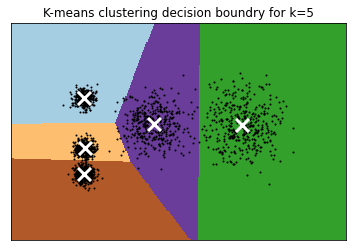

In [14]:
def plotKmeans(X,kmeans,k):
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering decision boundry for k=' + str(k))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
plotKmeans(X,kmeans,5)

In [15]:
kmeans.inertia_

207.98125554854408

##  Inertia as a function of k

C:\Users\msgam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


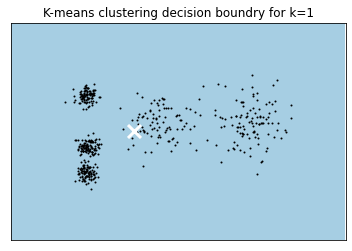

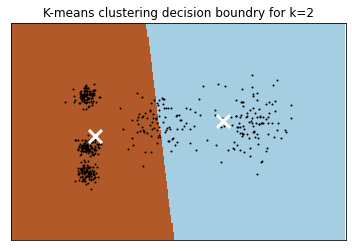

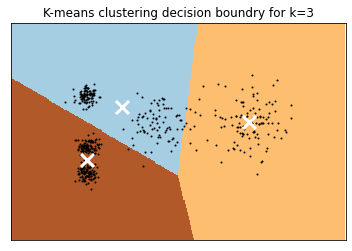

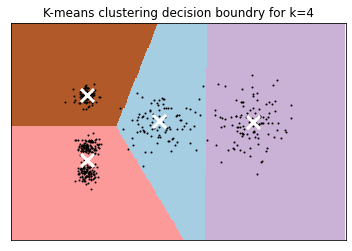

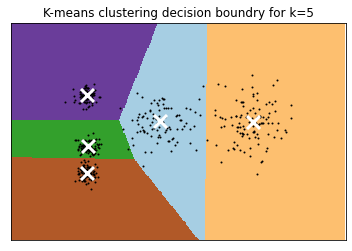

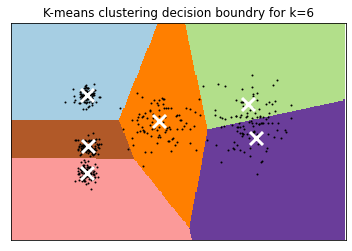

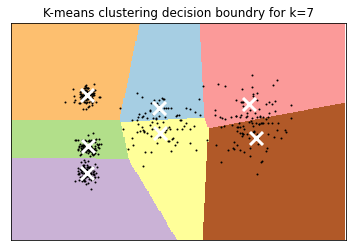

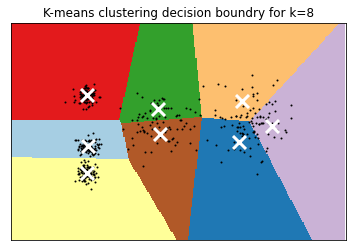

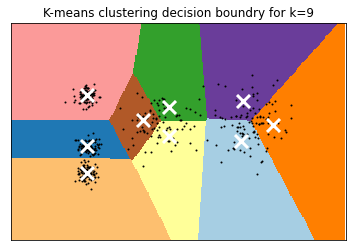

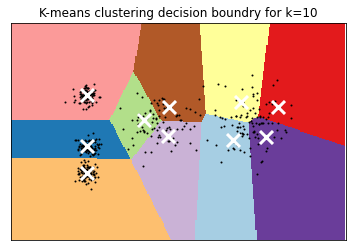

In [16]:
k = [1,2,3,4,5,6,7,8,9,10]

inertias = []

for i in k:
    kmeansmodel = KMeans(n_clusters=i, random_state=0)
    kmeansmodel.fit(Xblob_train)
    inertias.append(kmeansmodel.inertia_)
    plotKmeans(Xblob_test,kmeansmodel,i)

### As the value if k increases the inertia decreases. More neighbors are added which minimizes the distance of data points from the respective class centroid.

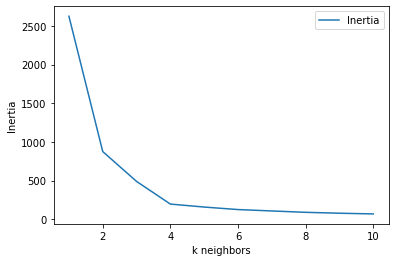

In [17]:
plt.plot(range(1, len(inertias)+1), inertias, label = 'Inertia')
plt.legend()
plt.xlabel("k neighbors")
plt.ylabel("Inertia")
plt.show()

## Value of k at elbow is 4

### As the value of k increases the inertia decreases. Inertia is the sum of squared distances of samples to their closest cluster center. As the value of k increases the inertia decreases, i.e. model tends to find optimal centroids for the each class which reduces distance of data points from their centroid. Initially with the increase of k the inertia rapidly decreases but later after passing optimal neighbors it decreases in linear fashion. As it can be seen below for k=3 inertia is more as compared to when k=8. 

In [18]:
print("K= ", 3, )
print("\tIntertia= ", inertias[4])
print("K= ", 8)
print("\tIntertia= ", inertias[9])

K=  3
	Intertia=  158.2610344262355
K=  8
	Intertia=  69.57317172220218
